In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
datos = pd.read_json("datos_prueba.json")

In [3]:
datos.head(5)

,Marca,Model,Price,Region,Type_use,Title,Km,Transmission,Fuel Type
0,Peugeot,403,7000000,Los Lagos,Particular,1960 Peugeot 403 403,80000.0,Manual,Bencina
1,Peugeot,403,6500000,Los Lagos,Particular,1960 Peugeot 403 403,80000.0,Manual,Bencina
2,Peugeot,406,3500000,Valparaíso,Particular,2000 Peugeot 406 2.0 ST ABS,194328.0,Manual,Bencina
3,Peugeot,309,6500000,Los Lagos,Particular,1993 Peugeot 309,97800.0,Manual,Bencina
4,Peugeot,106,1700000,Maule,Particular,1999 Peugeot 106 1.1 EQUINOXE,135000.0,Manual,Bencina


In [4]:
datos.shape

(49483, 9)

In [76]:
atipicos = [] #almacen de atipicos

In [5]:
year_data = datos["Title"]

In [6]:
def getYear(x,temp):
    if(len(temp[x])==4):
        try:
            temp_int = int(temp[x])
            if(temp_int<=2022):
                return temp_int
            else:
                return -1
        except:
            return -1
    else:
        return -1

def extractYear(temp):
    c = -1
    L=True
    result=-1
    while c<len(temp)-1 and L:
        c+=1
        if(getYear(c,temp)!=-1):
            result=getYear(c,temp)
            L=False
    if(result==-1):
        #result = None
        print("No se encontró año")
    return result

In [7]:
def getCilindrada(x,temp):
    #buscar que contenga un punto
    if(temp[x].find(".")!=-1):
        try:
            return float(temp[x])
        except:
            return -1
    else:
        return -1

def extractCil(temp):
    count = -1
    L=True
    temp_float=None
    while count<len(temp)-1 and L:
        count+=1
        if(getCilindrada(count,temp)!=-1):
            temp_float=getCilindrada(count,temp)
            L=False
    return temp_float


In [13]:
def filterPrice(df):
    return df[df["Price"]>2500000]

def filterKm(df):
    temp = df[df["Km"]<=250000]
    return temp[temp["Km"]>110000]

In [8]:
data_year =[]
data_cil =[]
for i in range(len(year_data)):
    temp = year_data.loc[i].split(" ")
    data_year.append(extractYear(temp))
    data_cil.append(extractCil(temp))

In [9]:
datos.shape

(49483, 9)

In [ ]:
len(data_year),len(data_cil)

In [10]:
datos["Year"]=data_year
#datos["Vol"]=data_cil

In [11]:
new_data = datos.dropna(axis=0)

In [12]:
new_data.shape

(45717, 10)

In [14]:
new_data = filterPrice(new_data)

In [15]:
new_data = filterKm(new_data)

In [16]:
new_data.shape

(15573, 10)

In [17]:
new_data.head()

,Marca,Model,Price,Region,Type_use,Title,Km,Transmission,Fuel Type,Year
2,Peugeot,406,3500000,Valparaíso,Particular,2000 Peugeot 406 2.0 ST ABS,194328.0,Manual,Bencina,2000
6,Peugeot,406,3200000,Metropolitana de Santiago,Particular,2000 Peugeot 406 1.8,113564.0,Automática,Bencina,2000
19,Peugeot,505,3350000,Metropolitana de Santiago,Particular,1991 Peugeot 505,150000.0,Manual,Bencina,1991
23,Peugeot,605,3700000,Metropolitana de Santiago,Particular,1997 Peugeot 605 Sri,150000.0,Manual,Bencina,1997
24,Peugeot,404,2800000,Valparaíso,Particular,1971 Peugeot 404,123456.0,Manual,Bencina,1971


In [18]:
transmision_df = new_data["Transmission"].values
for i in range(len(new_data)):
    if(transmision_df[i]=="Automática"):
        transmision_df[i]=1
    else:
        transmision_df[i]=0
combustible_df = new_data["Fuel Type"].values
for i in range(len(new_data)):
    if(combustible_df[i]=="Bencina"):
        combustible_df[i]=1
    else:
        combustible_df[i]=0

In [19]:
new_data["Transmision"] = transmision_df
new_data["Combustible"] = combustible_df

In [20]:
particular_df = new_data["Type_use"].values
for i in range(len(new_data)):
    if(particular_df[i]=="Particular"):
        particular_df[i]=1
    else:
        particular_df[i]=0

In [21]:
new_data["Type_use"] = particular_df
new_data.head()

,Marca,Model,Price,Region,Type_use,Title,Km,Transmission,Fuel Type,Year,Transmision,Combustible
2,Peugeot,406,3500000,Valparaíso,1,2000 Peugeot 406 2.0 ST ABS,194328.0,0,1,2000,0,1
6,Peugeot,406,3200000,Metropolitana de Santiago,1,2000 Peugeot 406 1.8,113564.0,1,1,2000,1,1
19,Peugeot,505,3350000,Metropolitana de Santiago,1,1991 Peugeot 505,150000.0,0,1,1991,0,1
23,Peugeot,605,3700000,Metropolitana de Santiago,1,1997 Peugeot 605 Sri,150000.0,0,1,1997,0,1
24,Peugeot,404,2800000,Valparaíso,1,1971 Peugeot 404,123456.0,0,1,1971,0,1


In [22]:
df_final = new_data.loc[:,["Price","Marca","Model","Type_use","Km","Transmission","Fuel Type","Year"]]

In [26]:
df_final.head()

,Price,Marca,Model,Type_use,Km,Transmission,Fuel Type,Year
2,3500000,Peugeot,406,1,194328.0,0,1,2000
6,3200000,Peugeot,406,1,113564.0,1,1,2000
19,3350000,Peugeot,505,1,150000.0,0,1,1991
23,3700000,Peugeot,605,1,150000.0,0,1,1997
24,2800000,Peugeot,404,1,123456.0,0,1,1971


In [27]:
df_final[df_final["Year"]>2022]

,Price,Marca,Model,Type_use,Km,Transmission,Fuel Type,Year


In [ ]:
#df_final.to_json("DATOS_LIMPIOS_JSON_sin_vol.json")

In [28]:
atipicos.append([df_final[df_final["Price"]>0.5*1e8]])
df_final= df_final[df_final["Price"]<0.5*1e8]

In [29]:
df_final= df_final[df_final["Year"]>1994]
atipicos.append([df_final[df_final["Year"]<=1994]])

In [ ]:
#df_final = df_final[df_final["Vol"]<20]
#df_final

In [30]:
df_final.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='Year', ylabel='Price'>

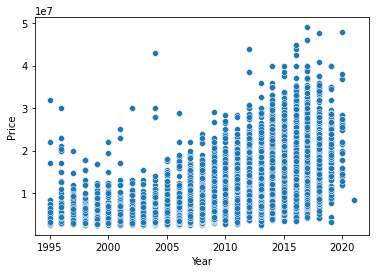

In [31]:
sns.scatterplot(x = "Year",y = "Price",data = df_final)

In [75]:
#pd.concat([atipicos[0][0],atipicos[0][1]],axis=1)
atipicos[0][0]

,Price,Marca,Model,Type_use,Km,Transmission,Fuel Type,Year
2854,107000000,Peugeot,208,1,130000.0,0,0,2018
4862,102000000,Mazda,5,1,116778.0,1,1,2014
4864,127000000,Mazda,Cx-5,1,189128.0,1,1,2014
9004,65000000,Mercedes-Benz,Actros,0,231600.0,1,0,2016
13022,107000000,Peugeot,208,1,130000.0,0,0,2018
17512,84500000,Nissan,X-Trail,1,150000.0,0,1,2010
18509,57000000,Nissan,Terrano,1,138000.0,0,0,2014
20352,100000000,Nissan,Versa,1,129600.0,0,1,2018
21691,123456789,Chevrolet,Corsa,1,218000.0,0,1,2000
21706,55000000,Chevrolet,Silverado,1,174000.0,1,1,1993


In [32]:
df_final['Type_use'] = df_final['Type_use'].astype(float)
df_final['Transmission'] = df_final['Transmission'].astype(float)
df_final['Fuel Type'] = df_final['Fuel Type'].astype(float)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15362 entries, 0 to 15361
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         15362 non-null  int64  
 1   Marca         15362 non-null  object 
 2   Model         15362 non-null  object 
 3   Type_use      15362 non-null  float64
 4   Km            15362 non-null  float64
 5   Transmission  15362 non-null  float64
 6   Fuel Type     15362 non-null  float64
 7   Year          15362 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 960.2+ KB


In [ ]:
f , ax = plt.subplots(figsize = (13,13))
sns.heatmap(df_final.corr(),annot=True)
plt.show();

In [36]:

import zipfile
import cv2
import plotly.express as px
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50 
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go

In [33]:
datos_pca = df_final.copy()
datos_pca

,Price,Marca,Model,Type_use,Km,Transmission,Fuel Type,Year
0,3500000,Peugeot,406,1.0,194328.0,0.0,1.0,2000
1,3200000,Peugeot,406,1.0,113564.0,1.0,1.0,2000
2,3700000,Peugeot,605,1.0,150000.0,0.0,1.0,1997
3,2650000,Peugeot,306,1.0,250000.0,0.0,1.0,2000
4,3100000,Peugeot,306,1.0,190000.0,0.0,1.0,1999
...,...,...,...,...,...,...,...,...
15357,3300000,Volkswagen,Gol,1.0,120000.0,0.0,1.0,2019
15358,19000000,Volkswagen,Tiguan,1.0,114500.0,1.0,1.0,2019
15359,14000000,Volkswagen,Saveiro,1.0,112000.0,0.0,1.0,2019
15360,26800000,Volkswagen,Amarok,1.0,153000.0,1.0,0.0,2019


In [34]:
datos_pca = datos_pca[["Price","Km","Transmission","Year"]]
#datos_pca = datos_pca[["Price","Type_use","Km","Transmission","Fuel Type","Year"]]

In [37]:
scaler = StandardScaler()
data_df_scaled = scaler.fit_transform(datos_pca)

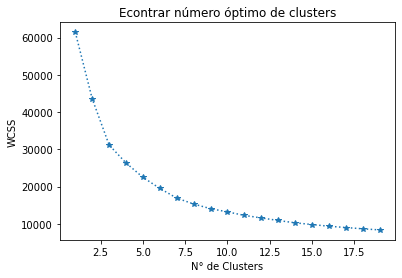

In [38]:
scores = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_df_scaled)
    scores.append(kmeans.inertia_)

plt.plot(range_values,scores, ':*')
plt.title("Econtrar número óptimo de clusters")
plt.xlabel("N° de Clusters")
plt.ylabel("WCSS")
plt.show()

In [48]:
# agrupar los datos usando kmeans
kmeans = KMeans(2)
kmeans.fit(data_df_scaled)
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [49]:
kmeans.cluster_centers_.shape


(2, 4)

In [50]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_,
                               columns = datos_pca.columns )
cluster_centers

,Price,Km,Transmission,Year
0,-0.681678,0.689371,-0.223831,-0.756030
1,0.507504,-0.513231,0.166641,0.562859


In [51]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns = [datos_pca.columns])
cluster_centers

,Price,Km,Transmission,Year
0,7.390102e+06,184961.982611,0.247559,2008.443563
1,1.431784e+07,141441.760277,0.434363,2014.199069


In [52]:
data_df_cluster = pd.concat([datos_pca,pd.DataFrame({'cluster':labels})],axis=1)
data_df_cluster


,Price,Km,Transmission,Year,cluster
0,3500000,194328.0,0.0,2000,0
1,3200000,113564.0,1.0,2000,0
2,3700000,150000.0,0.0,1997,0
3,2650000,250000.0,0.0,2000,0
4,3100000,190000.0,0.0,1999,0
...,...,...,...,...,...
15357,3300000,120000.0,0.0,2019,1
15358,19000000,114500.0,1.0,2019,1
15359,14000000,112000.0,0.0,2019,1
15360,26800000,153000.0,1.0,2019,1


In [53]:
#Reducir los datos originales a 3 dimesiones usando PCA para visualizar los clústeres.
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(data_df_scaled)
principal_comp

array([[-3.03758913,  0.29459276, -0.48354717],
       [-1.55256968,  1.35451788, -2.87243372],
       [-2.85814313,  0.17776356, -1.71758378],
       ...,
       [ 1.70389342, -1.51636747, -0.13737523],
       [ 3.02706719,  1.15837762,  1.05983344],
       [ 3.31826368,  1.16053878,  0.9710999 ]])

In [54]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2','pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-3.037589,0.294593,-0.483547
1,-1.552570,1.354518,-2.872434
2,-2.858143,0.177764,-1.717584
3,-3.837600,0.728242,0.722298
4,-3.160516,0.323351,-0.688070


In [55]:
#concatenar las etiquetas de los clústereres al dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df

,pca1,pca2,pca3,cluster
0,-3.037589,0.294593,-0.483547,0
1,-1.552570,1.354518,-2.872434,0
2,-2.858143,0.177764,-1.717584,0
3,-3.837600,0.728242,0.722298,0
4,-3.160516,0.323351,-0.688070,0
...,...,...,...,...
15357,0.466091,-1.925246,-0.634946,1
15358,2.689946,0.484850,-0.306027,1
15359,1.703893,-1.516367,-0.137375,1
15360,3.027067,1.158378,1.059833,1


In [56]:
fig = px.scatter_3d(pca_df,x = 'pca1',y='pca2',z= 'pca3',
                   color = 'cluster',symbol='cluster', size_max = 22, 
                   opacity=0.6)
fig.update_layout(margin = dict(l = 0, r  = 0, b = 0, t = 0 ))

In [57]:
#Reducir los datos originales a 2 dimesiones usando PCA para visualizar los clústeres.
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data_df_scaled)
principal_comp

array([[-3.03758913,  0.29459276],
       [-1.55256968,  1.35451788],
       [-2.85814313,  0.17776356],
       ...,
       [ 1.70389342, -1.51636747],
       [ 3.02706719,  1.15837762],
       [ 3.31826368,  1.16053878]])

In [58]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-3.037589,0.294593
1,-1.552570,1.354518
2,-2.858143,0.177764
3,-3.837600,0.728242
4,-3.160516,0.323351


In [59]:
#concatenar las etiquetas de los clústereres al dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df

,pca1,pca2,cluster
0,-3.037589,0.294593,0
1,-1.552570,1.354518,0
2,-2.858143,0.177764,0
3,-3.837600,0.728242,0
4,-3.160516,0.323351,0
...,...,...,...
15357,0.466091,-1.925246,1
15358,2.689946,0.484850,1
15359,1.703893,-1.516367,1
15360,3.027067,1.158378,1


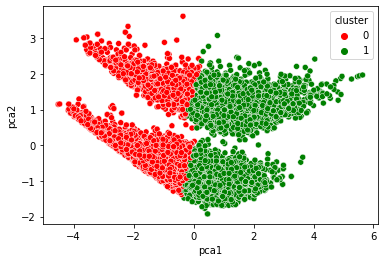

In [61]:
ax = sns.scatterplot(x=pca_df.pca1,y=pca_df.pca2, hue="cluster", data = pca_df, 
                     palette=["red","green"])
#ax = sns.scatterplot(x=pca_df.pca1,y=pca_df.pca2, hue="cluster", data = pca_df, palette=[,"orange","black","gray","purple","red","yellow","green","pink","blue"])

In [63]:
#Buscar la categoria que le pertenece nuestro autoco

filter_cluster3 = data_df_cluster[data_df_cluster['Transmission']==0.0]
filter_cluster3.reset_index(drop=True,inplace=True)
filter_cluster4 = filter_cluster3[filter_cluster3['Km']>220000]
filter_cluster4.reset_index(drop=True,inplace=True)
filter_cluster5 = filter_cluster4[filter_cluster4['Year']<2000]
filter_cluster5.reset_index(drop=True,inplace=True)
display(filter_cluster5['Price'].mean())
display(filter_cluster5.head())

4110177.777777778

,Price,Km,Transmission,Year,cluster
0,2550000,230000.0,0.0,1999,0
1,6700000,250000.0,0.0,1998,0
2,3200000,245000.0,0.0,1999,0
3,4700000,230000.0,0.0,1999,0
4,3000000,249295.0,0.0,1995,0


In [64]:
df_f = filter_cluster5[filter_cluster5['Km']>230000]

In [65]:
df_f[df_f['Km']<238000]

,Price,Km,Transmission,Year,cluster
5,4500000,235000.0,0.0,1996,0
20,3800000,235000.0,0.0,1999,0
21,3100000,236000.0,0.0,1998,0
41,4500000,235000.0,0.0,1996,0
44,2800000,234000.0,0.0,1999,0


In [66]:
# Glorot Uniform initializer: https://keras.rstudio.com/reference/initializer_glorot_uniform.html
input_df = Input(shape = (4,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(4, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - utilizado para reducir la dimensión
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [67]:
autoencoder.fit(data_df_scaled, data_df_scaled, batch_size = 128, epochs = 500, verbose = 3)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [68]:
pred = encoder.predict(data_df_scaled)

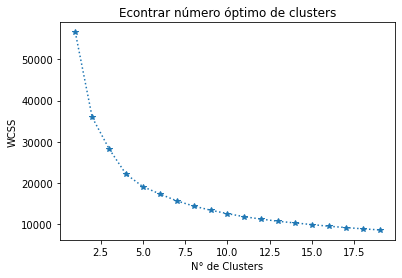

In [69]:
scores = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores.append(kmeans.inertia_)

plt.plot(range_values,scores, ':*')
plt.title("Econtrar número óptimo de clusters")
plt.xlabel("N° de Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(data_df_scaled)


In [ ]:
df_cluster_dr = pd.concat([datos_pca, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [datos_pca.columns])
cluster_centers 

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [datos_pca.columns])
cluster_centers

In [ ]:
# plot histogram for each feature based on cluster 
K=3 #numero de clusters
for i in datos_pca.columns:
    plt.figure(figsize = (30, 6))
    for j in range(K):
        plt.subplot(1, 3, j+1)
        cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
        cluster[i].hist()
        plt.title('{}    \nCluster - {} '.format(i,j))
plt.show()

In [ ]:
# Reducir los datos originales a 3 dimensiones usando ACP para visualizar los clústeres
pca = PCA(n_components = 3)
prin_comp = pca.fit_transform(data_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

In [ ]:
# Visualizar los clústers utilizando 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
# Reducir los datos originales a 3 dimensiones usando ACP para visualizar los clústeres
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(data_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)





In [ ]:
ax = sns.scatterplot(x=pca_df.pca1,y=pca_df.pca2, hue="cluster", data = pca_df, 
                     palette=["red","green","yellow"])
#ax = sns.scatterplot(x=pca_df.pca1,y=pca_df.pca2, hue="cluster", data = pca_df, palette=[,"orange","black","gray","purple","red","yellow","green","pink","blue"])

In [ ]:
#Buscar la categoria que le pertenece nuestro autoco
filter_cluster1 = data_df_cluster[data_df_cluster['Type_use']==1.0]
filter_cluster1.reset_index(drop=True,inplace=True)
filter_cluster2 = filter_cluster1[filter_cluster1['Fuel Type']==1.0]
filter_cluster2.reset_index(drop=True,inplace=True)
filter_cluster3 = filter_cluster2[filter_cluster2['Transmission']==0.0]
filter_cluster3.reset_index(drop=True,inplace=True)
filter_cluster4 = filter_cluster3[filter_cluster3['Km']>220000]
filter_cluster4.reset_index(drop=True,inplace=True)
filter_cluster5 = filter_cluster4[filter_cluster4['Year']<2000]
filter_cluster5.reset_index(drop=True,inplace=True)
display(filter_cluster5['Price'].mean())
display(filter_cluster5.head())

In [ ]:
f , ax = plt.subplots(figsize = (13,13))
sns.heatmap(df_final.corr(),annot=True)
plt.show();

In [ ]:
df_final = datos_pca.copy()

In [ ]:
Y = df_final["Price"]
X = df_final.iloc[:,1:]

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
Y = Y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(Y)
#Train
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=0.25)

In [ ]:
#Definiendo modelo
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1024,activation='relu',input_shape=(5,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1024,activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train,y_train,epochs = 100, batch_size = 128, validation_split=0.22)

In [ ]:
#evaluando modelo
epochs_hist.history.keys()

In [ ]:
#graphics loss, val_loss
f , ax = plt.subplots(figsize = (18,6))
ax.plot(epochs_hist.history['loss'],label='Training Loss')
ax.plot(epochs_hist.history['val_loss'],label='Validation Loss')
ax.set_title("Progress model of training")
ax.set_xlabel('Epoch')
ax.set_ylabel('Training and Validation Loss')
ax.legend()
plt.show()

In [ ]:

X_test_auto = np.array([[1.0,236000,0,1,1998]])
#X_test_auto= np.array([[440000,0,1,2010,1.6]])
scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_auto)
y_predict_1 = model.predict(X_test_scaled_1)
y_predict_1 = scaler.inverse_transform(y_predict_1)
#Revirtiendo el precio escalado y mostrando la prediccion
print(f"El precio de tu vehiculo es: {y_predict_1/857.07} USD")
print(f"El precio de tu vehiculo es: {y_predict_1} CLP")

In [ ]:
df_final['Marca'].value_counts()

In [ ]:
#funcion para visualizar el recuento de elementos en una columna determinada.
def barplot_visualization(x):
    fig = plt.Figure(figsize=(16,3))
    fig = px.bar(x = sales_df[x].value_counts().index,
                 y = sales_df[x].value_counts(), 
                 color = sales_df[x].value_counts().index, 
                 height=400)
    fig.show()